# Linear regression

### Linear regression with one variable

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [2]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
x = data.values[:, 0]
y = data.values[:, 1]

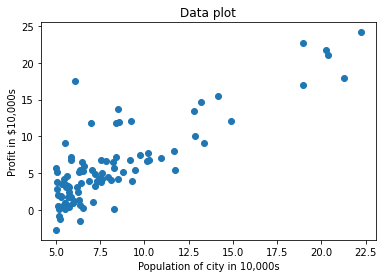

In [5]:
plt.scatter(x, y)
plt.title("Data plot")
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [6]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [7]:
def computeCost(X, y, theta):
    # 2-3 code lines as series of matrix operation
    diff_sg = (theta.T@X - y)**2
    return diff_sg.sum()/X.shape[1]/2

print(computeCost(X, y, theta))

32.072733877455676


In [8]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = []
    for i in range(it):
        theta = theta - alpha *(((theta.T @ X) - y) @ X.T).T / X.shape[1]
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [9]:
alpha = 0.01
it = 1000

theta, cost = simple_gradient(X, y, theta, alpha, it)
print(theta)

[[-3.24140214]
 [ 1.1272942 ]]


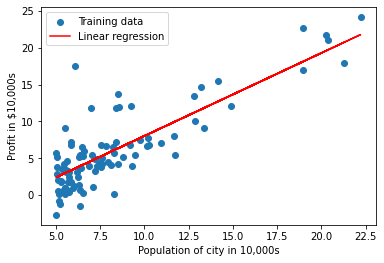

In [10]:
plt.scatter(x, y)
plt.plot(x, x*theta[1] + theta[0], 'r')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Training data", "Linear regression"])
plt.show()

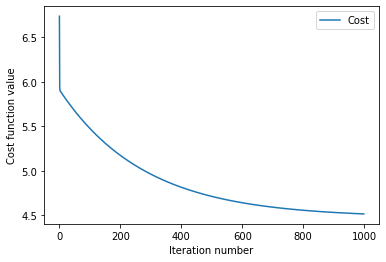

In [11]:
plt.plot(cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.legend(["Cost"])
plt.show()

### Linear regression with multiples variables

In [12]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [13]:
data2[["Size", "Bedrooms"]] = data2[["Size", "Bedrooms"]] - data2[["Size", "Bedrooms"]].mean()
data2[["Size", "Bedrooms"]] = data2[["Size", "Bedrooms"]]/data2[["Size", "Bedrooms"]].std()

In [14]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


In [15]:
data2.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,47.000000
mean,3.779483e-17,2.220446e-16,340412.659574
std,1.000000e+00,1.000000e+00,125039.899586
min,-1.445423e+00,-2.851859e+00,169900.000000
25%,-7.155897e-01,-2.236752e-01,249900.000000
50%,-1.417900e-01,-2.236752e-01,299900.000000
75%,3.376348e-01,1.090417e+00,384450.000000
max,3.117292e+00,2.404508e+00,699900.000000


In [16]:
x1 = data2.values[:,0]
x2 = data2.values[:,1]
y = data2.values[:,2]

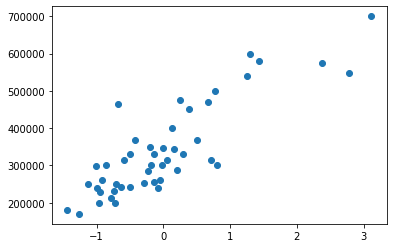

In [17]:
plt.scatter(x1, y)
plt.show()

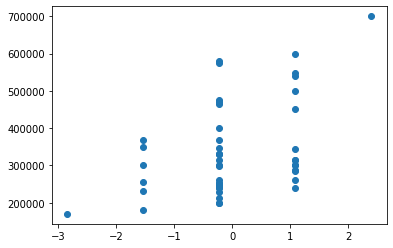

In [18]:
plt.scatter(x2, y)
plt.show()

In [19]:
X = np.stack([np.ones(x1.shape, dtype=np.float32), x1, x2], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [20]:
alpha = 0.01
it = 1000

theta_res, cost = simple_gradient(X, y, theta, alpha, it)
print(theta_res)

[[340397.96353532]
 [109848.00846026]
 [ -5866.45408497]]


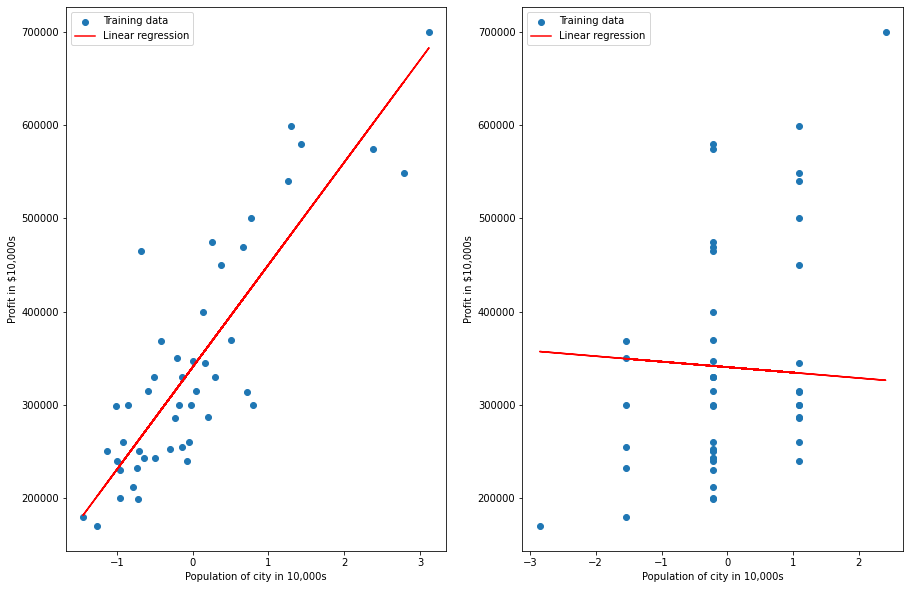

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].scatter(x1, y)
ax[0].plot(x1, x1*theta_res[1] + theta_res[0], 'r')
ax[0].set_xlabel ("Population of city in 10,000s")
ax[0].set_ylabel("Profit in $10,000s")
ax[0].legend(["Training data", "Linear regression"])
ax[1].scatter(x2, y)
ax[1].plot(x2, x2*theta_res[2] + theta_res[0], 'r')
ax[1].set_xlabel("Population of city in 10,000s")
ax[1].set_ylabel("Profit in $10,000s")
ax[1].legend(["Training data", "Linear regression"])

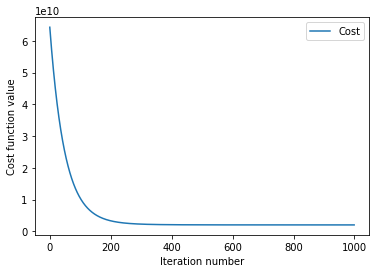

In [22]:
plt.plot(cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.legend(["Cost"])
plt.show()

### Linear regression - Python packages

Coefficients: 
 [1.11880313]
Residual sum of squares: 6.701534057783759


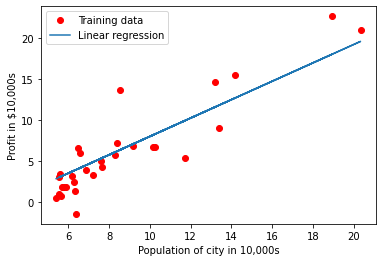

In [23]:
import numpy as np
from sklearn import datasets, linear_model, model_selection

# Data import
path = os.getcwd() + '/ex1data1.txt'
data3 = pd.read_csv(path, header=None, names=['Population', 'Profit'])

x = data3["Population"]
y = data3["Profit"]
# Normalization
 
# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x.to_numpy()[:, None], y, train_size=0.7, test_size=0.3, shuffle= True)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Y_pred = regr.predict(X_test)

plt.plot(X_test, Y_test, 'ro', X_test, Y_pred)
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Training data", "Linear regression"])
plt.show()